In [45]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#from tableone import TableOne

In [26]:
df = pd.read_csv('post_op_synthetic.csv', delimiter=';')

In [28]:
df.shape

(10000, 50)

In [10]:
df.describe()

,AkuttHel,AkuttDag,AkuttPK,ElHel,ElDag,ElPK,LoS,DtOp,innmateHast,Alder,...,KlartForOperasjon,KnivtidStart,KnivtidSlutt,StuetidSlutt,BMI_gruppe,ASA,LavestSystBT,LavestSystBT_NI,HøyestSystBT,HøyestSystBT_NI
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,8355.000000,8456.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.496900,0.008000,0.226200,0.43790,2.822900,3.843100,6.114300,1.48600,2.435800,74.138300,...,86.054700,97.666700,180.291800,193.786600,1.530341,2.348510,12.608200,79.054500,61.680500,121.108700
std,1.018182,0.126244,0.513673,0.95762,15.554399,4.812546,10.064689,4.99805,1.503098,10.191504,...,29.723951,33.306326,67.310884,69.420318,1.401846,1.202203,36.286531,46.313685,98.366797,64.934235
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,1.000000,29.000000,...,1.000000,18.000000,0.000000,26.000000,0.000000,0.000000,-320.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,0.00000,1.000000,66.000000,...,68.000000,72.000000,141.000000,156.000000,0.000000,2.000000,0.000000,77.000000,2.000000,134.000000
50%,0.000000,0.000000,0.000000,0.00000,0.000000,2.000000,3.000000,0.00000,1.000000,74.000000,...,81.000000,95.000000,167.000000,180.000000,2.000000,3.000000,0.000000,84.000000,3.000000,145.000000
75%,1.000000,0.000000,0.000000,1.00000,0.000000,7.000000,7.000000,0.00000,4.000000,83.000000,...,103.000000,114.000000,229.000000,244.000000,3.000000,3.000000,0.000000,111.000000,185.000000,158.000000
max,9.000000,2.000000,4.000000,8.00000,156.000000,48.000000,97.000000,50.00000,5.000000,97.000000,...,306.000000,398.000000,350.000000,380.000000,5.000000,5.000000,113.000000,201.000000,327.000000,244.000000


In [18]:
sorted(df.columns)

['ASA',
 'ASA_previsitt',
 'AkuttDag',
 'AkuttHel',
 'AkuttPK',
 'Alder',
 'Alvorlighet',
 'AnestesiGrp',
 'AnestesiStart',
 'BMI_gruppe',
 'DtOp',
 'ElDag',
 'ElHel',
 'ElPK',
 'HarAntibiotika',
 'HarMemo',
 'HastegradGrp',
 'HovedInngrepGrp',
 'HøyestSystBT',
 'HøyestSystBT_NI',
 'ICD10kap',
 'Intubert',
 'Kjonn',
 'KlartForOperasjon',
 'KnivtidSlutt',
 'KnivtidStart',
 'LavestSystBT',
 'LavestSystBT_NI',
 'LoS',
 'Operasjonsavdeling',
 'Opkategori',
 'PlanlagtKnivtid',
 'Postop',
 'Postop_Actilyse',
 'Postop_Intensiv',
 'Postop_Traume',
 'ProblemkodeGrp',
 'Smitte',
 'StuetidSlutt',
 'StuetidStart',
 'Target',
 'TempTatt',
 'TryggKirurgi_Avslutnsjekk',
 'TryggKirurgi_Forberedelsessjekk',
 'TryggKirurgi_Timeout',
 'Ukedag',
 'Undergruppe_operasjonskorGrp',
 'Varighet',
 'Ventetid_dager',
 'innmateHast']

In [21]:
Counter(df['Operasjonsavdeling'])

Counter({'HST - Operasjon ØST': 313,
         'HST - Sentraloperasjonen': 9658,
         'HST - Dagkirurgi Hillevåg': 14,
         'HST - DK-SYD': 15})

In [30]:
100*(df.isna().sum()/df.shape[0])

AkuttHel                            0.00
AkuttDag                            0.00
AkuttPK                             0.00
ElHel                               0.00
ElDag                               0.00
ElPK                                0.00
LoS                                 0.00
DtOp                                0.00
innmateHast                         0.00
ICD10kap                            0.00
Kjonn                               0.00
Alder                               0.00
Operasjonsavdeling                  0.00
ASA_previsitt                       0.00
Smitte                              0.00
Ukedag                              0.00
Ventetid_dager                      0.00
HastegradGrp                        0.00
Opkategori                          0.00
Postop                              0.00
PlanlagtKnivtid                     0.00
StuetidStart                        0.00
AnestesiStart                       0.00
KlartForOperasjon                   0.00
KnivtidStart    

In [23]:
Counter(df['Target'])

Counter({'Nei': 8160, 'Ja': 1840})

(0.0, 30.0)

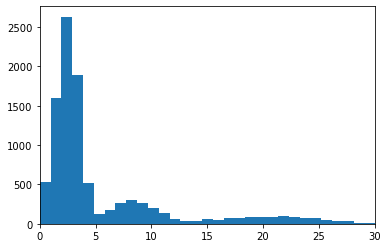

In [36]:
plt.hist(df['LoS'], bins=100)
plt.xlim([0,30])

Counter({'ØH': 5387, 'Elektiv': 4613})
Elektiv
ØH


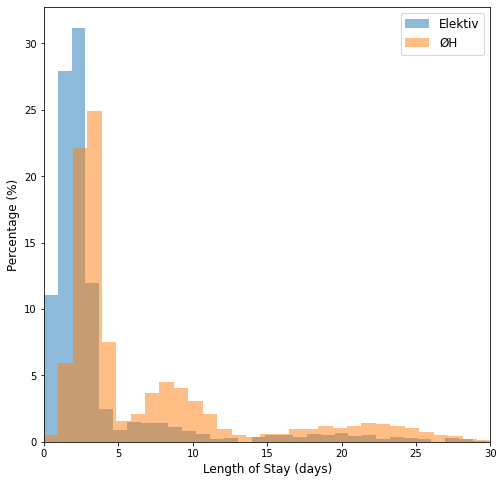

Z
K
D
L
N
S
T
J
A
E
C
M
R
I
G


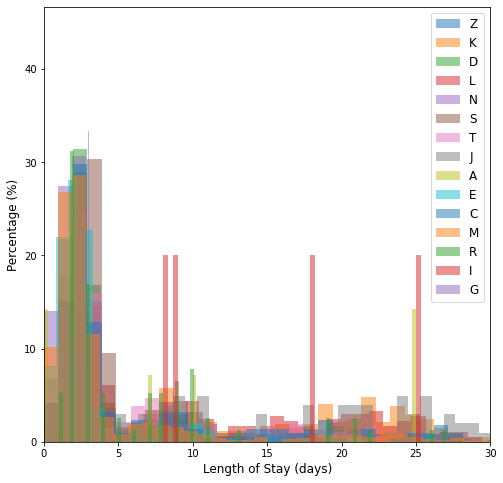

ASA 3
ASA 5
ASA 1
ASA 4
missing
ASA 2


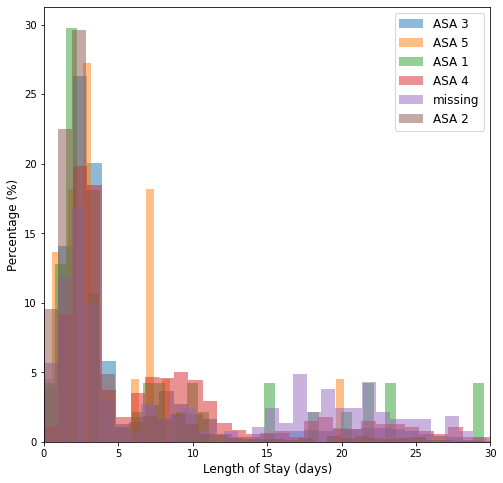

In [59]:
print(Counter(df['Opkategori']))

all_cats = ['Opkategori', 'ICD10kap', 'ASA_previsitt']
for cat in all_cats:
    plt.figure(figsize=(8,8))
    for o in set(df[cat]):
#         if o != 'missing':
#          continue
        print(o)
        temp_df = df[df[cat]==o]
        plt.hist(temp_df['LoS'], weights=100*np.ones(len(temp_df['LoS']))/len(temp_df['LoS']), alpha=0.5, bins=100, label=o)
    plt.xlim([0,30])
    plt.legend(fontsize=12)
    plt.xlabel('Length of Stay (days)', fontsize=12)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.show()

Counter({'S': 3271, 'M': 3242, 'D': 605, 'N': 529, 'T': 465, 'Z': 431, 'K': 414, 'L': 364, 'E': 246, 'C': 218, 'J': 101, 'R': 77, 'G': 18, 'A': 14, 'I': 5})
Z


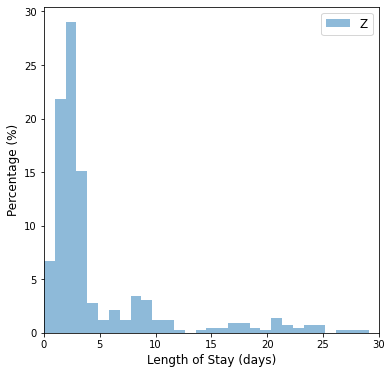

K


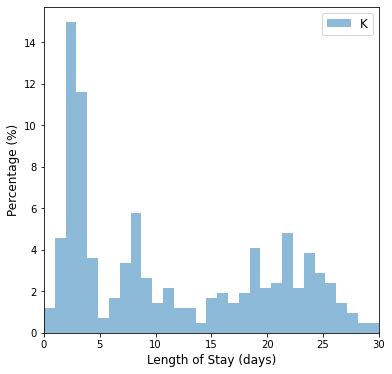

D


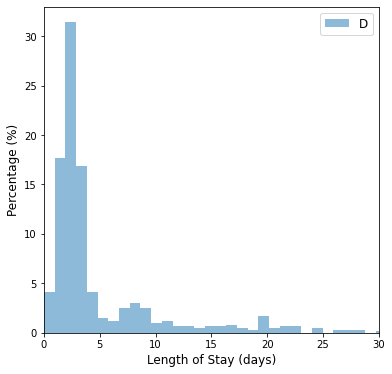

L


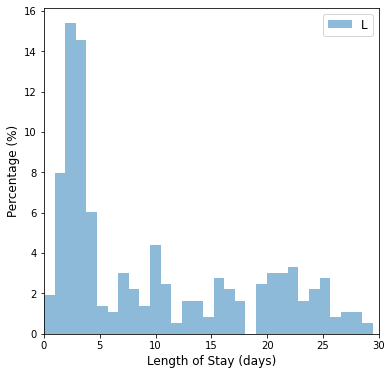

N


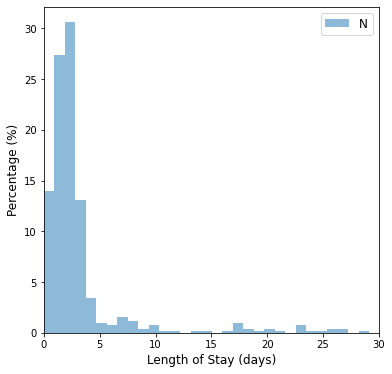

S


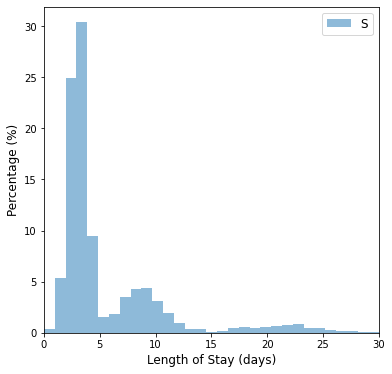

T


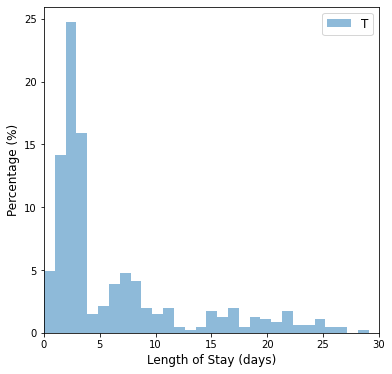

J


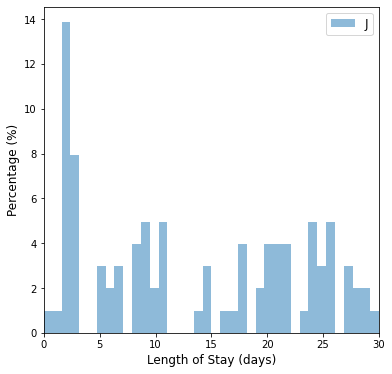

A


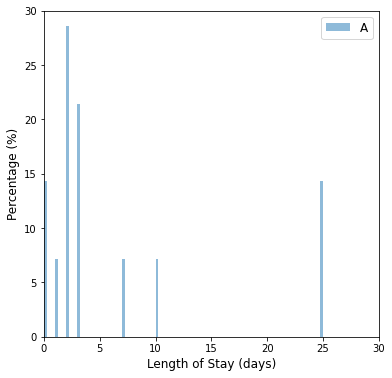

E


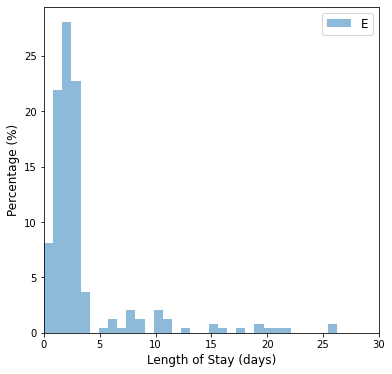

C


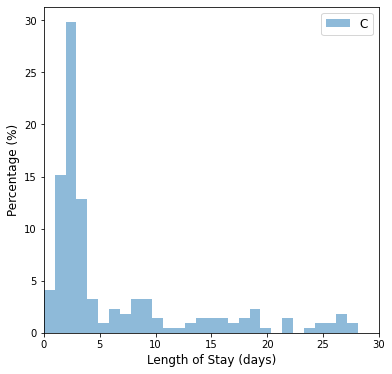

M


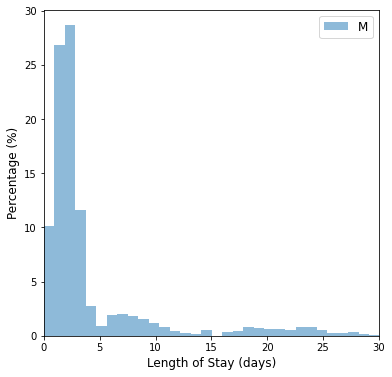

R


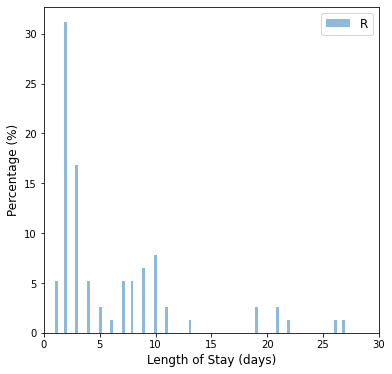

I


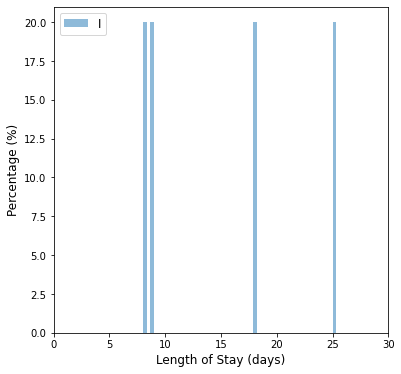

G


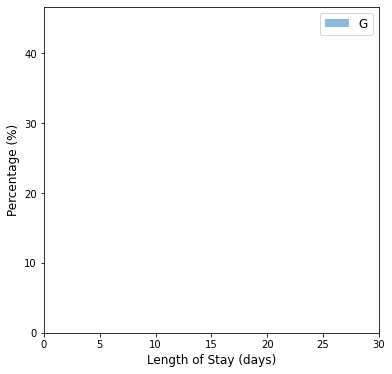

In [52]:
print(Counter(df['ICD10kap']))

#plt.figure(figsize=(6,6))
for o in set(df['ICD10kap']):
    print(o)
    plt.figure(figsize=(6,6))
    temp_df = df[df['ICD10kap']==o]
    plt.hist(temp_df['LoS'], weights=100*np.ones(len(temp_df['LoS']))/len(temp_df['LoS']), alpha=0.5, bins=100, label=o)
    plt.xlim([0,30])
    plt.legend(fontsize=12)
    plt.xlabel('Length of Stay (days)', fontsize=12)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.show()
    #plt.xlim([0,30])
#plt.legend(fontsize=12)
#plt.xlabel('Length of Stay (days)', fontsize=12)
#plt.ylabel('Percentage (%)', fontsize=12)
#plt.show()

(array([7.659e+03, 0.000e+00, 8.620e+02, 0.000e+00, 1.830e+02, 0.000e+00,
        2.620e+02, 0.000e+00, 2.140e+02, 0.000e+00, 9.300e+01, 0.000e+00,
        4.900e+01, 0.000e+00, 5.000e+01, 0.000e+00, 6.200e+01, 0.000e+00,
        7.500e+01, 0.000e+00, 6.000e+01, 0.000e+00, 6.800e+01, 0.000e+00,
        6.300e+01, 0.000e+00, 3.700e+01, 0.000e+00, 2.600e+01, 0.000e+00,
        1.700e+01, 0.000e+00, 1.200e+01, 0.000e+00, 8.000e+00, 0.000e+00,
        4.000e+00, 0.000e+00, 7.000e+00, 0.000e+00, 4.000e+00, 0.000e+00,
        7.000e+00, 0.000e+00, 7.000e+00, 0.000e+00, 1.400e+01, 0.000e+00,
        1.800e+01, 0.000e+00, 8.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        7.000e+00, 0.000e+00, 7.000e+00, 0.000e+00, 8.000e+00, 0.000e+00,
        9.000e+00, 0.000e+00, 8.000e+00, 0.000e+00, 6.000e+00, 0.000e+00,
        9.000e+00, 0.000e+00, 1.100e+01, 0.000e+00, 7.000e+00, 0.000e+00,
        8.000e+00, 0.000e+00, 5.000e+00, 0.000e+00, 6.000e+00, 0.000e+00,
        8.000e+00, 0.000e+00, 3.000e+0

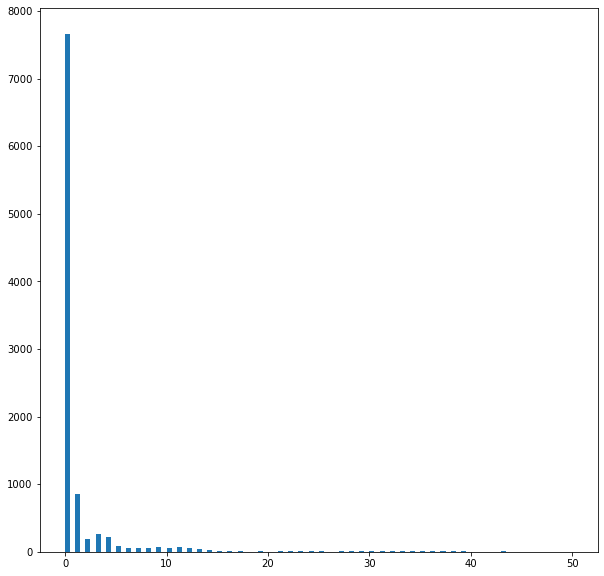

In [56]:
plt.figure(figsize=(10,10))
plt.hist(df['DtOp'], bins=100)